In [265]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import xarray as xr
print(f"Running on PyMC v{pm.__version__}")
import seaborn as sns
df = pd.read_csv(r'../../Downloads/datasets-master/tips.csv')
df

Running on PyMC v3.11.2


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [433]:
df.describe()

,total_bill,tip,size,gender,smokers,weekend,dinner
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.643443,0.381148,0.668033,0.721311
std,8.902412,1.383638,0.951100,0.479967,0.486667,0.471887,0.449276
min,3.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.347500,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,17.795000,2.900000,2.000000,1.000000,0.000000,1.000000,1.000000
75%,24.127500,3.562500,3.000000,1.000000,1.000000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000


In [266]:
df['gender'] = df.groupby('sex').ngroup()
df['smokers'] = df.groupby('smoker').ngroup()
df.drop(columns=['sex', 'smoker'], inplace=True)
df

,total_bill,tip,day,time,size,gender,smokers
0,16.99,1.01,Sun,Dinner,2,0,0
1,10.34,1.66,Sun,Dinner,3,1,0
2,21.01,3.50,Sun,Dinner,3,1,0
3,23.68,3.31,Sun,Dinner,2,1,0
4,24.59,3.61,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,Dinner,3,1,0
240,27.18,2.00,Sat,Dinner,2,0,1
241,22.67,2.00,Sat,Dinner,2,1,1
242,17.82,1.75,Sat,Dinner,2,1,0


In [267]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [268]:
sun = df['day'] == 'Sun'
sat = df['day'] == 'Sat'
temp_df = pd.DataFrame({'Sun': sun, 'Sat': sat})
df['wkend'] = temp_df['Sun'] | temp_df['Sat'] == True
df['weekend'] = df.groupby('wkend').ngroup()
df.drop(columns=['day', 'wkend'], inplace=True)
df

,total_bill,tip,time,size,gender,smokers,weekend
0,16.99,1.01,Dinner,2,0,0,1
1,10.34,1.66,Dinner,3,1,0,1
2,21.01,3.50,Dinner,3,1,0,1
3,23.68,3.31,Dinner,2,1,0,1
4,24.59,3.61,Dinner,4,0,0,1
...,...,...,...,...,...,...,...
239,29.03,5.92,Dinner,3,1,0,1
240,27.18,2.00,Dinner,2,0,1,1
241,22.67,2.00,Dinner,2,1,1,1
242,17.82,1.75,Dinner,2,1,0,1


In [269]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [270]:
dinner = df['time'] == 'Dinner'
df['din'] = dinner
df['dinner'] = df.groupby('din').ngroup()
df.drop(columns=['din', 'time'], inplace=True)
df

,total_bill,tip,size,gender,smokers,weekend,dinner
0,16.99,1.01,2,0,0,1,1
1,10.34,1.66,3,1,0,1,1
2,21.01,3.50,3,1,0,1,1
3,23.68,3.31,2,1,0,1,1
4,24.59,3.61,4,0,0,1,1
...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,1
240,27.18,2.00,2,0,1,1,1
241,22.67,2.00,2,1,1,1,1
242,17.82,1.75,2,1,0,1,1


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'smokers'}>,
        <AxesSubplot:title={'center':'weekend'}>],
       [<AxesSubplot:title={'center':'dinner'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

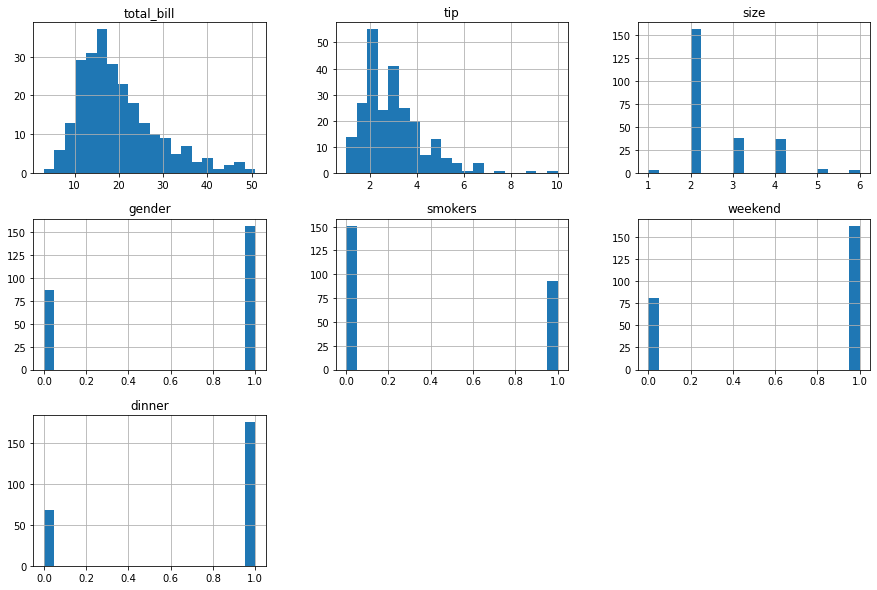

In [271]:
df.hist(bins=20, figsize=(15,10))

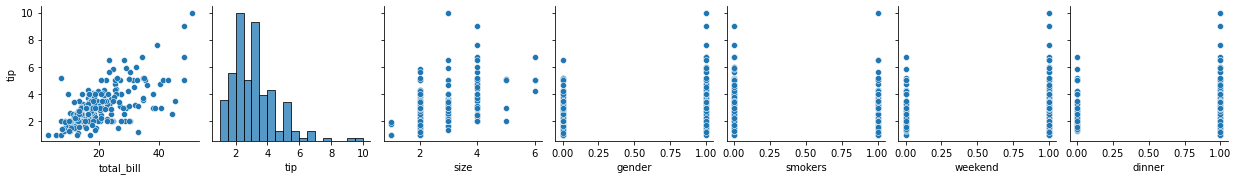

In [158]:
sns.pairplot(df, y_vars=['tip'])

In [160]:
df.corr()

,total_bill,tip,size,gender,smokers,weekend,dinner
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,0.176770,0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,0.120198,0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.148022,0.103411
gender,0.144877,0.088862,0.086195,1.000000,0.002816,0.220194,0.205231
smokers,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.020196,0.054921
weekend,0.176770,0.120198,0.148022,0.220194,-0.020196,1.000000,0.881758
dinner,0.183118,0.121629,0.103411,0.205231,0.054921,0.881758,1.000000


In [410]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     df.drop(columns=['tip']), df['tip'], test_size=0.30, random_state=42)

In [162]:
X_train.columns

Index(['total_bill', 'size', 'gender', 'smokers', 'weekend', 'dinner'], dtype='object')

In [435]:
with pm.Model() as model:    
    total_bill = pm.Data('total_bill', X_train.total_bill)
    size = pm.Data('size', X_train.size)
    gender = pm.Data('gender', X_train.gender)
    smoker = pm.Data('smoker', X_train.smokers)
    dinner = pm.Data('dinner', X_train.dinner)
    weekend = pm.Data('weekend', X_train.weekend)
    
    y = pm.Data('y',y_train)
    
    a = pm.Normal('Intercept', mu=0, sigma=10)
    b_size = pm.Normal('beta_size', mu=0, sigma=10)
    b_tb = pm.HalfNormal('beta_totalbill', sigma=5)
    b_gender = pm.Normal('beta_gender', sigma=10)
    b_smoker = pm.Normal('beta_smoker', mu=0, sigma=10)
    b_dinner = pm.Normal('beta_dinner', mu=0, sigma=10)
    b_wkend = pm.Normal('beta_weekend', mu=0, sigma=10)
    
    sigma = pm.Uniform('sigma', lower = 1, upper=10)
    
    mu = pm.Deterministic('mu', a + b_size*size + b_tb * total_bill + b_gender * gender +
                          b_smoker * smoker + b_dinner*dinner + b_wkend * weekend)
    
    yhat = pm.Normal('yhat', mu=mu, sd=sigma, observed=y)
    
    trace = pm.sample(tune=1000, draws=500, cores=2, target_accept=.95, return_inferencedata=True, model=model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta_weekend, beta_dinner, beta_smoker, beta_gender, beta_totalbill, beta_size, Intercept]


/usr/local/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 207 seconds.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'beta_size'}>,
        <AxesSubplot:title={'center':'beta_size'}>],
       [<AxesSubplot:title={'center':'beta_gender'}>,
        <AxesSubplot:title={'center':'beta_gender'}>],
       [<AxesSubplot:title={'center':'beta_smoker'}>,
        <AxesSubplot:title={'center':'beta_smoker'}>],
       [<AxesSubplot:title={'center':'beta_dinner'}>,
        <AxesSubplot:title={'center':'beta_dinner'}>],
       [<AxesSubplot:title={'center':'beta_weekend'}>,
        <AxesSubplot:title={'center':'beta_weekend'}>],
       [<AxesSubplot:title={'center':'beta_totalbill'}>,
        <AxesSubplot:title={'center':'beta_totalbill'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

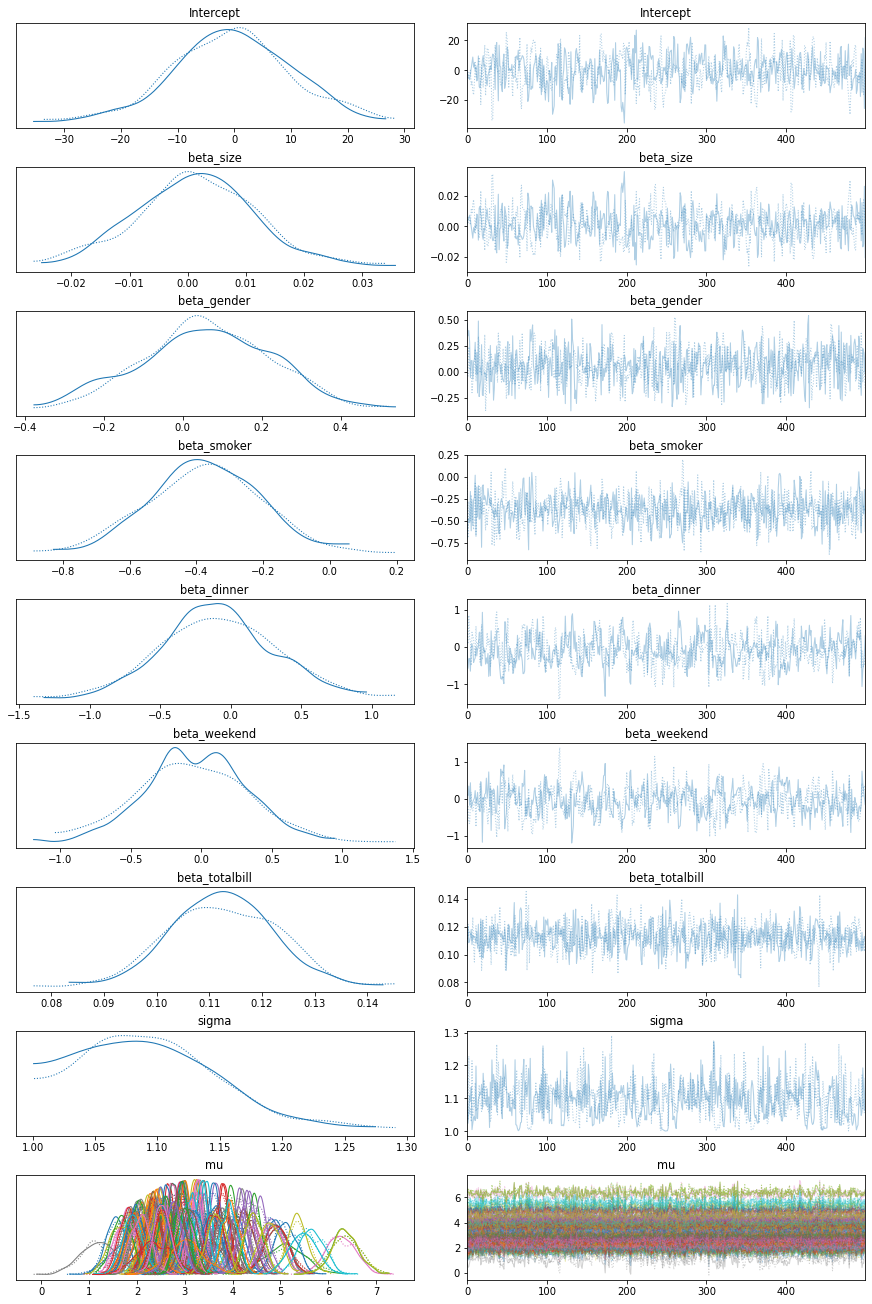

In [436]:
az.plot_trace(trace)

In [437]:
results = pm.summary(trace)
results

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.433,10.427,-21.828,18.631,0.471,0.360,490.0,420.0,495.0,466.0,1.0
beta_size,0.001,0.010,-0.018,0.021,0.000,0.000,492.0,420.0,497.0,505.0,1.0
beta_gender,0.062,0.167,-0.241,0.379,0.006,0.005,870.0,528.0,862.0,716.0,1.0
beta_smoker,-0.374,0.171,-0.724,-0.091,0.006,0.004,928.0,928.0,931.0,816.0,1.0
beta_dinner,-0.086,0.404,-0.800,0.721,0.021,0.015,383.0,383.0,382.0,442.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
mu[165],2.860,0.161,2.541,3.143,0.005,0.004,995.0,992.0,991.0,798.0,1.0
mu[166],2.535,0.182,2.233,2.911,0.006,0.004,1060.0,1058.0,1058.0,859.0,1.0
mu[167],1.188,0.395,0.416,1.888,0.018,0.013,464.0,464.0,463.0,538.0,1.0
mu[168],4.451,0.200,4.101,4.828,0.006,0.004,1184.0,1177.0,1203.0,858.0,1.0


In [438]:
pm.set_data({"total_bill": X_test.total_bill, 'size': X_test.size, 'gender': X_test.gender, 
            'smoker': X_test.smokers, 'dinner': X_test.dinner, 'weekend': X_test.weekend}, model=model)
# Generate posterior samples.
ppc_test = pm.sample_posterior_predictive(trace, model=model)

/usr/local/anaconda3/lib/python3.9/site-packages/arviz/data/base.py:169: UserWarning: More chains (1000) than draws (74). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


<AxesSubplot:title={'center':'yhat'}>

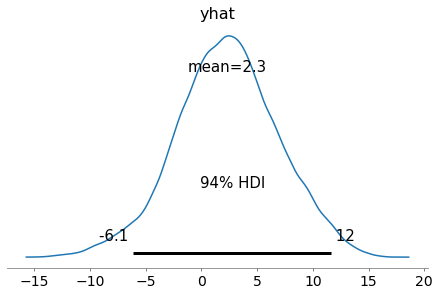

In [439]:
pm.plot_posterior(ppc_test)

# Using Posterior Distribution

In [440]:
pred_post = ppc_test['yhat'].mean(0)
pred_mean = results['mean']['Intercept'] + results['mean']['beta_size'] * X_test['size'] + results['mean']['beta_totalbill'] * X_test.total_bill + results['mean']['beta_gender'] * X_test.gender + results['mean']['beta_smoker'] * X_test.smokers + results['mean']['beta_dinner'] * X_test.dinner + results['mean']['beta_weekend'] * X_test.weekend

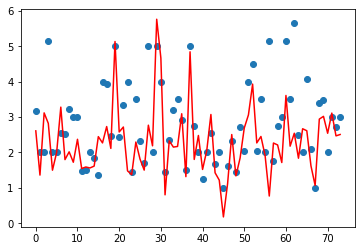

In [441]:
X_test['pred_post'] = pred_post
X_test['pred_mean'] = pred_mean
plots = X_test.merge(y_test, left_index=True, right_index=True)

plt.scatter(np.arange(plots.shape[0]), plots.tip)
plt.plot(np.arange(plots.shape[0]), plots.pred_post, c='r')

# Using Mean of Beta Distributions

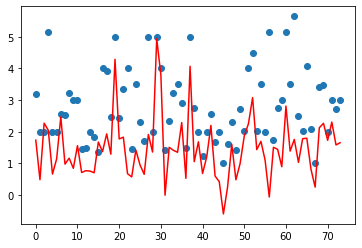

In [442]:
plt.scatter(np.arange(plots.shape[0]), plots.tip)
plt.plot(np.arange(plots.shape[0]), plots.pred_mean, c='r')